# **FRAUD DETECTION MODEL**

### Arthor: KHALLIDAH IDRIS
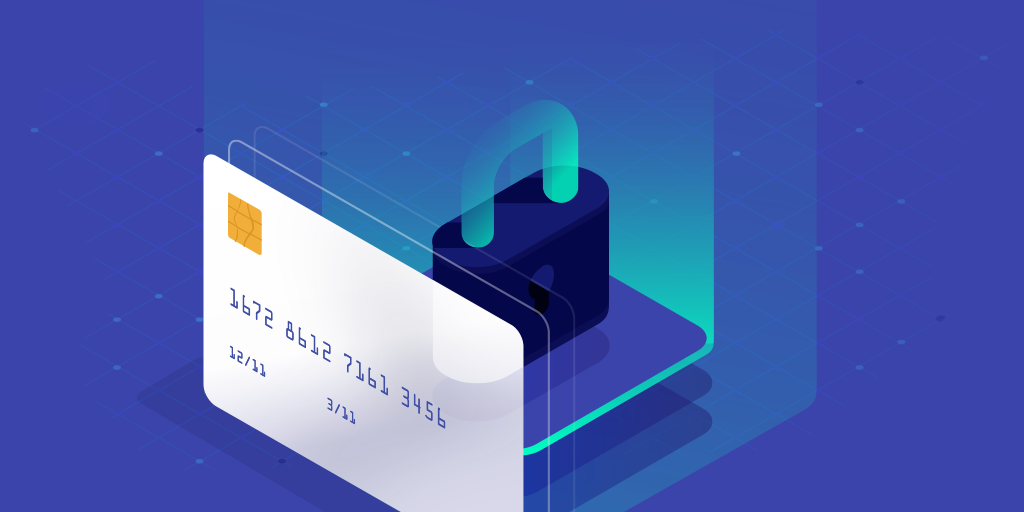

TABLE OF CONTENTS

1.IMPORTING LIBRARIES

2.LOADING DATA

3.DATA CONTENT

4.EXPLORATORY DATA ANALYSIS AND DATA VISUALIZATION

5.DATA PREPROCESSING

6.TRAIN TEST SPLIT

7.MODEL TRAINING AND EVALUATING - RandomForrestClassifier - AdaBoostClassifier - CatBoostClassifier - XGBoost - LightGBM

8.AUC-ROC CURVE

9.CONCLUSION

# **IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.tools as tls
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')

# LOADING DATA

In [ ]:
df = pd.read_csv('FraudDetectionDataset.csv')

# DATA CONTENT

In [ ]:
df.shape

(6000000, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000000 entries, 0 to 5999999
Data columns (total 32 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Transaction ID                     int64  
 1   User ID                            int64  
 2   Transaction Amount                 float64
 3   Transaction Date and Time          object 
 4   Merchant ID                        int64  
 5   Payment Method                     object 
 6   Country Code                       object 
 7   Transaction Type                   object 
 8   Device Type                        object 
 9   IP Address                         object 
 10  Browser Type                       object 
 11  Operating System                   object 
 12  Merchant Category                  object 
 13  User Age                           int64  
 14  User Occupation                    object 
 15  User Income                        float64
 16  User Gender       

In [ ]:
df.describe()

,Transaction ID,User ID,Transaction Amount,Merchant ID,User Age,User Income,Location Distance,Time Taken for Transaction,User's Transaction History,Merchant's Reputation Score,User's Credit Score,Merchant's Business Age,Fraudulent Flag
count,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06,6.000000e+06
mean,5.501906e+07,5.499571e+03,5.005515e+02,5.500817e+03,4.900159e+01,5.049328e+04,5.050600e+01,3.049492e+01,5.048393e+01,2.999382e+00,5.749533e+02,1.049685e+01,4.999843e-01
std,2.598067e+07,2.598744e+03,2.884166e+02,2.598350e+03,1.818538e+01,2.858223e+04,2.857562e+01,1.703567e+01,2.886705e+01,1.154479e+00,1.590197e+02,5.764884e+00,5.000000e-01
min,1.000004e+07,1.000000e+03,1.000000e+00,1.000000e+03,1.800000e+01,1.000020e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+02,1.000000e+00,0.000000e+00
25%,3.251666e+07,3.248000e+03,2.507900e+02,3.251000e+03,3.300000e+01,2.573446e+04,2.576000e+01,1.574000e+01,2.500000e+01,2.000000e+00,4.370000e+02,5.000000e+00,0.000000e+00
50%,5.502987e+07,5.499000e+03,5.005100e+02,5.501000e+03,4.900000e+01,5.050294e+04,5.051000e+01,3.050000e+01,5.000000e+01,3.000000e+00,5.750000e+02,1.000000e+01,0.000000e+00
75%,7.752487e+07,7.751000e+03,7.504400e+02,7.752000e+03,6.500000e+01,7.523454e+04,7.525000e+01,4.526000e+01,7.500000e+01,4.000000e+00,7.130000e+02,1.500000e+01,1.000000e+00
max,9.999988e+07,9.999000e+03,1.000000e+03,9.999000e+03,8.000000e+01,1.000000e+05,1.000000e+02,6.000000e+01,1.000000e+02,5.000000e+00,8.500000e+02,2.000000e+01,1.000000e+00


# CHECKING FOR MISSING VALUES

In [ ]:
df.isnull().sum()

Transaction ID                       0
User ID                              0
Transaction Amount                   0
Transaction Date and Time            0
Merchant ID                          0
Payment Method                       0
Country Code                         0
Transaction Type                     0
Device Type                          0
IP Address                           0
Browser Type                         0
Operating System                     0
Merchant Category                    0
User Age                             0
User Occupation                      0
User Income                          0
User Gender                          0
User Account Status                  0
Transaction Status                   0
Location Distance                    0
Time Taken for Transaction           0
Transaction Time of Day              0
User's Transaction History           0
Merchant's Reputation Score          0
User's Device Location               0
Transaction Currency     

In [ ]:
# Remove all existing NaN values in the DataFrame
df = df.dropna()
df.shape

(6000000, 32)

## **EXPLORATORY** DATA ANALYSIS AND DATA VISUALIZATION

In [ ]:
fraudulent_transaction_count = df["Fraudulent Flag"].value_counts()
fraudulent_transaction_count

0    3000094
1    2999906
Name: Fraudulent Flag, dtype: int64

<Axes: title={'center': 'Distribution of Normal and Fraudulent Transactions (Normal:0  Fraudulent:1)'}>

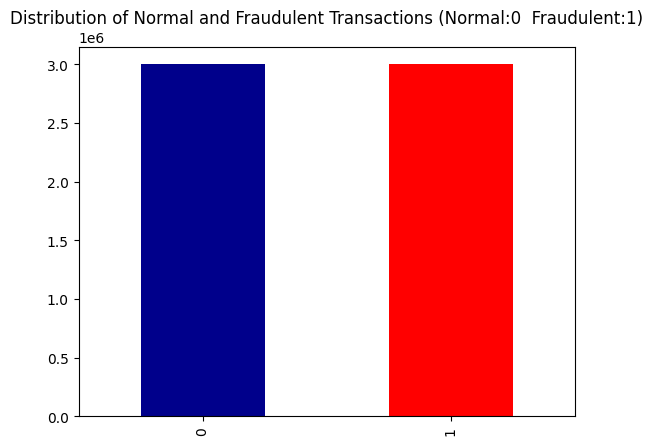

In [ ]:
fraudulent_transaction_count.plot(kind="bar", title = "Distribution of Normal and Fraudulent Transactions (Normal:0  Fraudulent:1)", color = ["darkblue", "red"])

This data is highly balanced with respect to the target variable Fraudulent Flag, which means the dataset contains an equal number of fraudulent and non-fraudulent transactions.

In [ ]:
# Plot a heatmap of the correlation between the features
corr = df.corr()
corr.style.background_gradient(cmap='Blues')

,Transaction ID,User ID,Transaction Amount,Merchant ID,User Age,User Income,Location Distance,Time Taken for Transaction,User's Transaction History,Merchant's Reputation Score,User's Credit Score,Merchant's Business Age,Fraudulent Flag
Transaction ID,1.000000,-0.000085,-0.000304,-0.000019,0.000351,0.000148,0.000224,0.000322,-0.000003,0.000132,0.000303,-0.000032,-0.000695
User ID,-0.000085,1.000000,-0.000315,-0.000568,0.000101,-0.000725,-0.000501,0.000129,-0.000094,-0.000625,0.000593,-0.000396,-0.000490
Transaction Amount,-0.000304,-0.000315,1.000000,0.000158,0.000097,-0.000685,-0.000408,-0.000218,-0.001034,-0.000505,-0.000116,0.000065,0.000064
Merchant ID,-0.000019,-0.000568,0.000158,1.000000,-0.000141,-0.000087,0.000180,-0.000665,0.000286,-0.000664,-0.000387,0.000711,-0.000191
User Age,0.000351,0.000101,0.000097,-0.000141,1.000000,-0.000102,0.000285,-0.000367,0.000195,-0.000561,0.000087,0.000472,0.000357
User Income,0.000148,-0.000725,-0.000685,-0.000087,-0.000102,1.000000,0.000595,0.000124,0.000118,0.000046,-0.000294,0.001005,0.000543
Location Distance,0.000224,-0.000501,-0.000408,0.000180,0.000285,0.000595,1.000000,-0.000109,0.000434,-0.000512,0.000256,0.000734,0.000277
Time Taken for Transaction,0.000322,0.000129,-0.000218,-0.000665,-0.000367,0.000124,-0.000109,1.000000,-0.000276,0.000163,0.000005,0.000096,-0.000262
User's Transaction History,-0.000003,-0.000094,-0.001034,0.000286,0.000195,0.000118,0.000434,-0.000276,1.000000,-0.000491,-0.000156,0.000487,0.000755
Merchant's Reputation Score,0.000132,-0.000625,-0.000505,-0.000664,-0.000561,0.000046,-0.000512,0.000163,-0.000491,1.000000,-0.000444,0.000399,0.000322


The correlation graph shows that there is no significant correlation between the target data and the other features. This means that the values of the other features do not provide enough information about the value of the target data. In other words, it might affect our prediction model..

# This is a graph of Time against Transaction showing the distribution of valid and fraudulent transactions over time of the day (Daytime, Evening, Nighttime).

In [ ]:
from plotly.offline import iplot
from plotly.subplots import make_subplots


# Fraudulent transaction count over time
count_0 = df[df['Fraudulent Flag']==0].groupby('Transaction Time of Day').count()["Fraudulent Flag"]

# Non-Fraudulent transaction count over time
count_1 = df[df['Fraudulent Flag']==1].groupby('Transaction Time of Day').count()["Fraudulent Flag"]

# Concatenate
counts_df = pd.concat([count_0, count_1], axis=1, keys=["Class 0", "Class 1"]).fillna(0)
df_counts = counts_df.reset_index()


# Subplots
fig = make_subplots(
    rows=1, cols=2,

    subplot_titles=("Non Frauds","Frauds"))
fig.add_trace(go.Scatter(x=df_counts["Transaction Time of Day"], y=df_counts["Class 0"], name="Transactions", marker = {'color' : "#1E90FF"}),
                 row=1, col=1)

fig.add_trace(go.Scatter(x=df_counts["Transaction Time of Day"], y=df_counts["Class 1"], name="Transactions", marker = {'color' : "#FF4500"}),
                 row=1, col=2)

fig['layout']['xaxis']['title']='Transaction Time of Day'
fig['layout']['yaxis']['title']='Transaction'
fig['layout']['xaxis2']['title']='Transaction Time of Day'
fig['layout']['yaxis2']['title']='Transaction'

fig.show()


Fraudulent transactions are more likely to occur in the evening .

# DATA PREPROCESSING

RENAMING, REMODELLING AND DROPPING OF SOME COLUMNS AND ASSIGNING TO A NEW VARIABLE NAME - NEW_DF WITHOUT ALTERING THE RAW DATA

In [ ]:
df = df.rename(columns={"User's Transaction History": "Users Transaction History", "User's Credit Score": "Users Credit Score",
                       "User's Device Location": "Users Device Location", "User's Email Domain": "Users Email Domain",
                       "Merchant's Business Age": "Merchants Business Age", "Merchant's Reputation Score": "Merchants Reputation Score"})

In [ ]:
new_df = df.copy()

In [ ]:
#Using LabelEncoder to convert categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
le = LabelEncoder()
new_df['Payment Method'] = le.fit_transform(new_df['Payment Method'])
new_df['Transaction Time of Day'] = le.fit_transform(new_df['Transaction Time of Day'])

In [ ]:
# Converting the categorical data to dummy variables
new_df = pd.get_dummies(new_df, columns=['Merchant Category', 'Device Type', 'Operating System','User Account Status','Transaction Status',
                                         'User Occupation','Transaction Type','Transaction Purpose','Browser Type','User Gender',
                                         'Country Code','Users Email Domain','Transaction Authentication Method',
                                         'Transaction Currency','Users Device Location'])


In [ ]:
# Remove the dots from the IP address
def remove_dots(ip_address):
  return ip_address.replace(".", "")


new_df['IP Address'] = new_df['IP Address'].apply(remove_dots)

new_df['IP Address'] = np.int64(new_df['IP Address'])

In [ ]:
new_df = new_df.drop(['Transaction ID','User ID','Merchant ID','Transaction Date and Time'],axis =1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3822 entries, 0 to 3821
Columns: 537 entries, Transaction Amount to Users Device Location_Vietnam
dtypes: float64(10), int64(3), uint8(524)
memory usage: 2.3 MB


In [ ]:
# Remove all existing NaN values in the DataFrame
new_df = new_df.dropna()

In [ ]:
new_df.head()

,Transaction Amount,Payment Method,IP Address,User Age,User Income,Location Distance,Time Taken for Transaction,Transaction Time of Day,Users Transaction History,Merchants Reputation Score,...,Users Device Location_Spain,Users Device Location_Sweden,Users Device Location_Switzerland,Users Device Location_Taiwan,Users Device Location_Thailand,Users Device Location_Turkey,Users Device Location_United Arab Emirates,Users Device Location_United Kingdom,Users Device Location_United States,Users Device Location_Vietnam
0,163.08,1,4223223120,68,66826.21,9.34,24.22,0,26,2.71,...,0,0,0,0,0,0,0,1,0,0
1,430.74,0,3952212120,22,89356.71,65.28,55.11,0,60,3.95,...,0,0,0,0,0,0,0,0,0,0
2,415.74,20,24318023629,71,58438.63,44.05,53.84,0,81,3.81,...,0,0,0,0,0,0,0,0,0,0
3,565.89,10,21218622714,78,3426.92,21.70,21.62,0,18,2.67,...,1,0,0,0,0,0,0,0,0,0
4,955.49,39,16611310199,31,53080.12,56.63,53.71,0,98,3.19,...,0,0,0,0,0,0,0,0,0,0


# **TRAIN - TEST SPLIT**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
y = new_df['Fraudulent Flag']
X = new_df.drop(['Fraudulent Flag'],axis =1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train

,Transaction Amount,Payment Method,IP Address,User Age,User Income,Location Distance,Time Taken for Transaction,Transaction Time of Day,Users Transaction History,Merchants Reputation Score,...,Users Device Location_Spain,Users Device Location_Sweden,Users Device Location_Switzerland,Users Device Location_Taiwan,Users Device Location_Thailand,Users Device Location_Turkey,Users Device Location_United Arab Emirates,Users Device Location_United Kingdom,Users Device Location_United States,Users Device Location_Vietnam
2828,91.18,17,16248220191,60.0,15233.85,32.98,40.46,2,21.0,2.95,...,0,1,0,0,0,0,0,0,0,0
1684,674.85,39,362097113,58.0,49704.02,3.39,1.73,1,75.0,4.19,...,0,0,0,0,0,0,0,0,0,0
2184,387.68,18,1653530116,75.0,13706.71,84.59,59.81,2,85.0,3.99,...,0,0,0,0,0,0,0,0,0,0
1674,501.11,38,8512955105,71.0,74054.28,74.92,18.68,1,12.0,2.45,...,0,0,0,0,0,0,0,0,1,0
1499,248.63,39,5130188158,25.0,53644.83,78.55,52.91,1,46.0,3.48,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,405.72,19,130109165157,38.0,64619.01,13.91,38.28,1,52.0,1.12,...,0,0,0,0,0,0,0,0,0,0
1294,698.18,35,32020042,51.0,23871.76,90.07,51.97,2,98.0,4.44,...,0,0,0,0,0,0,0,0,0,0
860,597.12,31,20627130248,43.0,33064.53,68.67,9.91,2,49.0,4.20,...,0,0,0,0,0,0,0,0,0,0
3507,112.95,38,124461481,71.0,71227.08,53.18,33.52,2,26.0,3.80,...,0,0,0,0,0,0,0,0,0,1


# BUILDING THE MODEL

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00


IMPORTING MORE LIBRARIES

In [ ]:
from scipy import stats
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [37]:
#Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Handle class imbalance using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(sampling_strategy='minority')
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# CATBOOST CLASSIFIER

In [ ]:
import catboost as cb
from catboost import CatBoostClassifier

# Create a CatBoost classifier
clf = cb.CatBoostClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train_resampled, y_train_resampled)

Learning rate set to 0.015462
0:	learn: 0.6927813	total: 52.2ms	remaining: 52.1s
1:	learn: 0.6925370	total: 57.1ms	remaining: 28.5s
2:	learn: 0.6920597	total: 61.8ms	remaining: 20.5s
3:	learn: 0.6919242	total: 66.2ms	remaining: 16.5s
4:	learn: 0.6917100	total: 70.7ms	remaining: 14.1s
5:	learn: 0.6914502	total: 75.2ms	remaining: 12.5s
6:	learn: 0.6910640	total: 79.7ms	remaining: 11.3s
7:	learn: 0.6907343	total: 84.2ms	remaining: 10.4s
8:	learn: 0.6904225	total: 88.6ms	remaining: 9.76s
9:	learn: 0.6900921	total: 93.1ms	remaining: 9.22s
10:	learn: 0.6898028	total: 97.5ms	remaining: 8.77s
11:	learn: 0.6894785	total: 102ms	remaining: 8.4s
12:	learn: 0.6891081	total: 107ms	remaining: 8.09s
13:	learn: 0.6887343	total: 111ms	remaining: 7.82s
14:	learn: 0.6882658	total: 116ms	remaining: 7.6s
15:	learn: 0.6877914	total: 120ms	remaining: 7.39s
16:	learn: 0.6874385	total: 125ms	remaining: 7.21s
17:	learn: 0.6872027	total: 129ms	remaining: 7.05s
18:	learn: 0.6870070	total: 134ms	remaining: 6.9s
19:

In [ ]:
#Make predictions on the test set
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
#Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.50
Precision: 0.52
Recall: 0.51
F1 Score: 0.52
Confusion Matrix:
[[290 311]
 [322 338]]


# OTHER MODELS

In [ ]:
knn=KNeighborsClassifier()
svc=SVC()
nb=GaussianNB()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
lgb=LGBMClassifier()
gbc=GradientBoostingClassifier()
abc=AdaBoostClassifier()
lr=LogisticRegression()


models = [knn, svc, nb, dtc, rfc, xgb, lgb, gbc, abc, lr]


for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(type(model).__name__, "Model Test Accuracy Score is: ", accuracy_score(y_test, y_pred))
    print(type(model).__name__, "Model Test F1 Score is: ", f1_score(y_test, y_pred))
    print(type(model).__name__,"Mean_absolute_error: ",mean_absolute_error(y_test, y_pred))
    print(type(model).__name__,"Mean_squared_error: ",mean_squared_error(y_test, y_pred))
    print(type(model).__name__,"Root_mean_squared_error: ",np.sqrt(mean_squared_error(y_test, y_pred)))
    print(type(model).__name__,"R2_score: ",r2_score(y_test, y_pred))
    print(type(model).__name__,"Classification_report: \n",classification_report(y_test, y_pred))
    fig=px.imshow(confusion_matrix(y_test, y_pred),color_continuous_scale="Viridis",title=type(model).__name__,
                  width=400,height=400,labels=dict(x="Predicted", y="Actual", color="Counts"),template="plotly_dark")
    fig.show()

KNeighborsClassifier Model Test Accuracy Score is:  0.5035685963521015
KNeighborsClassifier Model Test F1 Score is:  0.5300300300300301
KNeighborsClassifier Mean_absolute_error:  0.4964314036478985
KNeighborsClassifier Mean_squared_error:  0.4964314036478985
KNeighborsClassifier Root_mean_squared_error:  0.7045788839071878
KNeighborsClassifier R2_score:  -0.9900821862552309
KNeighborsClassifier Classification_report: 
               precision    recall  f1-score   support

         0.0       0.48      0.47      0.47       601
         1.0       0.53      0.53      0.53       660

    accuracy                           0.50      1261
   macro avg       0.50      0.50      0.50      1261
weighted avg       0.50      0.50      0.50      1261



SVC Model Test Accuracy Score is:  0.48770816812053924
SVC Model Test F1 Score is:  0.5113464447806354
SVC Mean_absolute_error:  0.5122918318794607
SVC Mean_squared_error:  0.5122918318794607
SVC Root_mean_squared_error:  0.7157456474750375
SVC R2_score:  -1.0536630867745673
SVC Classification_report: 
               precision    recall  f1-score   support

         0.0       0.46      0.46      0.46       601
         1.0       0.51      0.51      0.51       660

    accuracy                           0.49      1261
   macro avg       0.49      0.49      0.49      1261
weighted avg       0.49      0.49      0.49      1261



GaussianNB Model Test Accuracy Score is:  0.49008723235527357
GaussianNB Model Test F1 Score is:  0.50727969348659
GaussianNB Mean_absolute_error:  0.5099127676447264
GaussianNB Mean_squared_error:  0.5099127676447264
GaussianNB Root_mean_squared_error:  0.7140817653775556
GaussianNB R2_score:  -1.044125951696667
GaussianNB Classification_report: 
               precision    recall  f1-score   support

         0.0       0.47      0.48      0.47       601
         1.0       0.51      0.50      0.51       660

    accuracy                           0.49      1261
   macro avg       0.49      0.49      0.49      1261
weighted avg       0.49      0.49      0.49      1261



DecisionTreeClassifier Model Test Accuracy Score is:  0.5138778747026169
DecisionTreeClassifier Model Test F1 Score is:  0.5192156862745099
DecisionTreeClassifier Mean_absolute_error:  0.486122125297383
DecisionTreeClassifier Mean_squared_error:  0.486122125297383
DecisionTreeClassifier Root_mean_squared_error:  0.6972245874159796
DecisionTreeClassifier R2_score:  -0.9487546009176622
DecisionTreeClassifier Classification_report: 
               precision    recall  f1-score   support

         0.0       0.49      0.53      0.51       601
         1.0       0.54      0.50      0.52       660

    accuracy                           0.51      1261
   macro avg       0.51      0.51      0.51      1261
weighted avg       0.52      0.51      0.51      1261



RandomForestClassifier Model Test Accuracy Score is:  0.4964314036478985
RandomForestClassifier Model Test F1 Score is:  0.5096525096525096
RandomForestClassifier Mean_absolute_error:  0.5035685963521015
RandomForestClassifier Mean_squared_error:  0.5035685963521015
RandomForestClassifier Root_mean_squared_error:  0.7096256734026056
RandomForestClassifier R2_score:  -1.0186935914889323
RandomForestClassifier Classification_report: 
               precision    recall  f1-score   support

         0.0       0.47      0.49      0.48       601
         1.0       0.52      0.50      0.51       660

    accuracy                           0.50      1261
   macro avg       0.50      0.50      0.50      1261
weighted avg       0.50      0.50      0.50      1261



XGBClassifier Model Test Accuracy Score is:  0.4837430610626487
XGBClassifier Model Test F1 Score is:  0.49961568024596464
XGBClassifier Mean_absolute_error:  0.5162569389373514
XGBClassifier Mean_squared_error:  0.5162569389373514
XGBClassifier Root_mean_squared_error:  0.718510221873949
XGBClassifier R2_score:  -1.0695583119044016
XGBClassifier Classification_report: 
               precision    recall  f1-score   support

         0.0       0.46      0.47      0.47       601
         1.0       0.51      0.49      0.50       660

    accuracy                           0.48      1261
   macro avg       0.48      0.48      0.48      1261
weighted avg       0.48      0.48      0.48      1261



[LightGBM] [Info] Number of positive: 1294, number of negative: 1266
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010671 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3576
[LightGBM] [Info] Number of data points in the train set: 2560, number of used features: 535
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.505469 -> initscore=0.021876
[LightGBM] [Info] Start training from score 0.021876
LGBMClassifier Model Test Accuracy Score is:  0.5051546391752577
LGBMClassifier Model Test F1 Score is:  0.5185185185185185
LGBMClassifier Mean_absolute_error:  0.4948453608247423
LGBMClassifier Mean_squared_error:  0.4948453608247423
LGBMClassifier Root_mean_squared_error:  0.703452458112659
LGBMClassifier R2_score:  -0.9837240962032974
LGBMClassifier Classification_report: 
               precision    recall  f1-score   support

        

GradientBoostingClassifier Model Test Accuracy Score is:  0.4980174464710547
GradientBoostingClassifier Model Test F1 Score is:  0.5293680297397769
GradientBoostingClassifier Mean_absolute_error:  0.5019825535289453
GradientBoostingClassifier Mean_squared_error:  0.5019825535289453
GradientBoostingClassifier Root_mean_squared_error:  0.7085072713310325
GradientBoostingClassifier R2_score:  -1.0123355014369988
GradientBoostingClassifier Classification_report: 
               precision    recall  f1-score   support

         0.0       0.47      0.45      0.46       601
         1.0       0.52      0.54      0.53       660

    accuracy                           0.50      1261
   macro avg       0.50      0.50      0.50      1261
weighted avg       0.50      0.50      0.50      1261



AdaBoostClassifier Model Test Accuracy Score is:  0.486122125297383
AdaBoostClassifier Model Test F1 Score is:  0.5023041474654378
AdaBoostClassifier Mean_absolute_error:  0.5138778747026169
AdaBoostClassifier Mean_squared_error:  0.5138778747026169
AdaBoostClassifier Root_mean_squared_error:  0.7168527566401742
AdaBoostClassifier R2_score:  -1.0600211768265009
AdaBoostClassifier Classification_report: 
               precision    recall  f1-score   support

         0.0       0.46      0.48      0.47       601
         1.0       0.51      0.50      0.50       660

    accuracy                           0.49      1261
   macro avg       0.49      0.49      0.49      1261
weighted avg       0.49      0.49      0.49      1261



LogisticRegression Model Test Accuracy Score is:  0.5043616177636796
LogisticRegression Model Test F1 Score is:  0.5225362872421696
LogisticRegression Mean_absolute_error:  0.4956383822363204
LogisticRegression Mean_squared_error:  0.4956383822363204
LogisticRegression Root_mean_squared_error:  0.7040158962951905
LogisticRegression R2_score:  -0.9869031412292641
LogisticRegression Classification_report: 
               precision    recall  f1-score   support

         0.0       0.48      0.49      0.48       601
         1.0       0.53      0.52      0.52       660

    accuracy                           0.50      1261
   macro avg       0.50      0.50      0.50      1261
weighted avg       0.50      0.50      0.50      1261



In [ ]:
# comparing all model accuracy:

models = [knn, svc, nb, dtc, rfc, xgb, lgb, gbc, abc, lr]

fig=px.bar(x=[type(model).__name__ for model in models], y=[accuracy_score(y_test, model.predict(X_test)) for model in models],
         color=[accuracy_score(y_test, model.predict(X_test)) for model in models], color_continuous_scale="Viridis",
            title="Model Comparison", labels=dict(x="Model", y="Accuracy"), template="plotly_dark", width=800,
            height=600,text=[accuracy_score(y_test, model.predict(X_test)) for model in models])
#fig.update_layout(yaxis_range=[0.97,0.99])
fig.show()

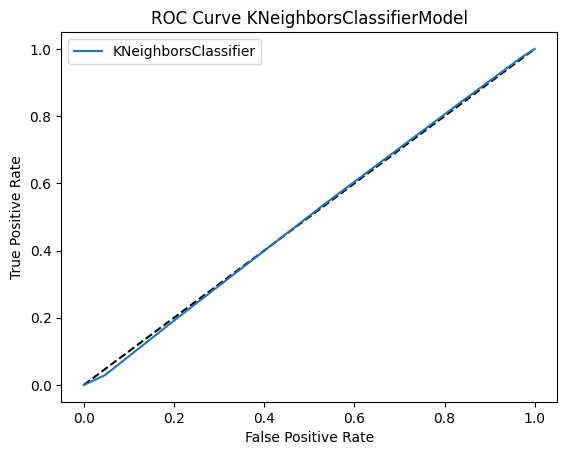

KNeighborsClassifier Model AUC Score is:  0.4989537639288055


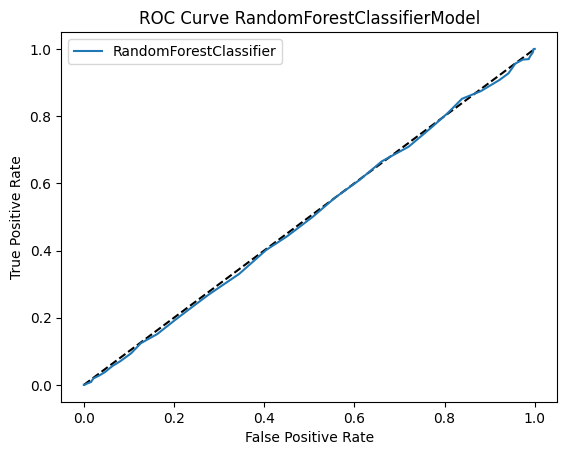

RandomForestClassifier Model AUC Score is:  0.49429864367468357


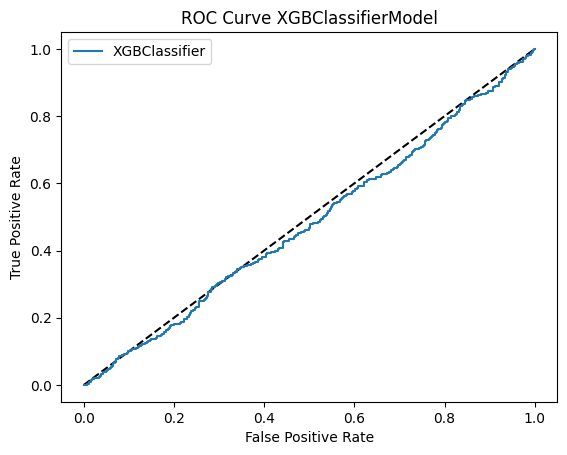

XGBClassifier Model AUC Score is:  0.481535824131498


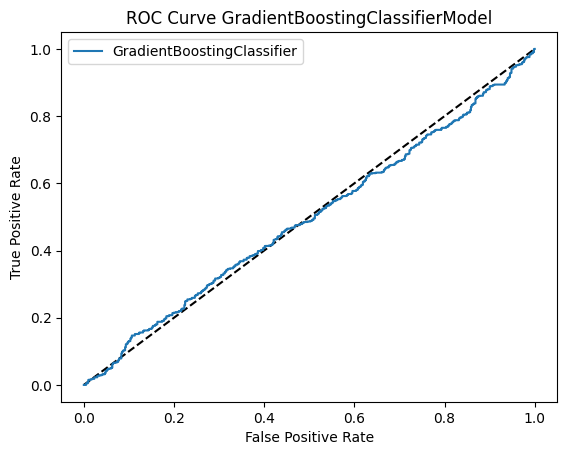

GradientBoostingClassifier Model AUC Score is:  0.4948444511672465


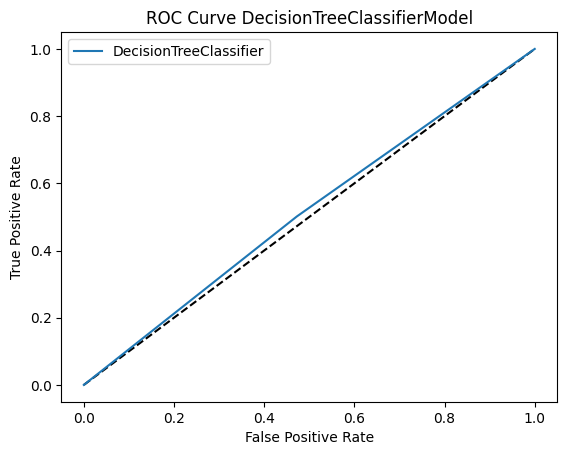

DecisionTreeClassifier Model AUC Score is:  0.514484697221802


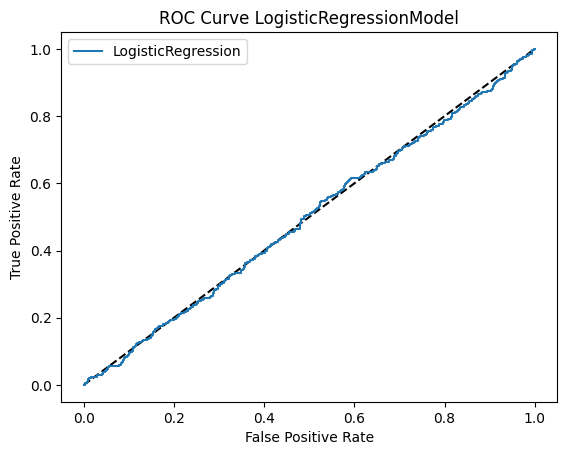

LogisticRegression Model AUC Score is:  0.49586547673070136


In [ ]:
from sklearn.metrics import roc_curve, auc

models = [knn, rfc, xgb, gbc, dtc, lr]

for model in models:
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1], "k--")
    plt.plot(fpr, tpr, label=type(model).__name__)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve "+type(model).__name__+"Model")
    plt.legend()
    plt.show()
    print(type(model).__name__, "Model AUC Score is: ", auc(fpr, tpr))

# CONCLUSION:

After investigating the data, visualizing the features and analyzing their relationships. I trained and evaluated eleven (11) predictive models, splitting the data into train and test sets. I used the AUC-ROC curve and other metrics to assess the models' performance. The DecisionTreeClassifier model achieved the best results, with an AUC score of 0.51 and an accuracy of 0.51.

# THANK YOU.